In [82]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler

In [83]:
# Loading the Dataset
customer_df = pd.read_csv('C:/Users/chowd/OneDrive/Desktop/Datasets/Mall_Customers.xls')

In [84]:
customer_df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [85]:
customer_df.shape

(200, 5)

In [86]:
customer_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [87]:
customer_df.drop(columns=['CustomerID'],inplace=True)

In [88]:
# Checking for Null Values
customer_df.isna().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

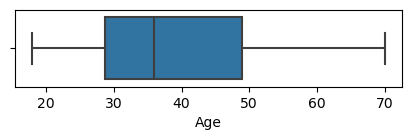

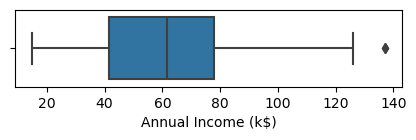

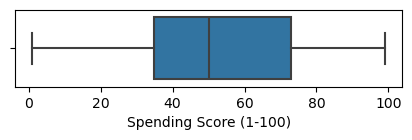

In [89]:
# Checking for Outliers
for col in customer_df.describe().columns:
    plt.figure(figsize=(5,1))
    sns.boxplot(data=customer_df,x=col)
    plt.show()

In [90]:
# The dataset is free from null values and outliers

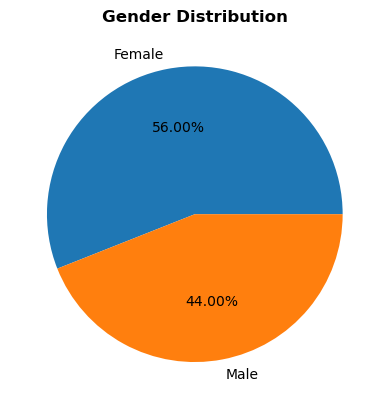

In [91]:
# Exploratory Data Analysis
gender_count = customer_df['Gender'].value_counts()
plt.title("Gender Distribution", fontsize = 12, weight='bold')
plt.pie(gender_count,labels=gender_count.index,radius=1, autopct='%.2f%%')
plt.show()

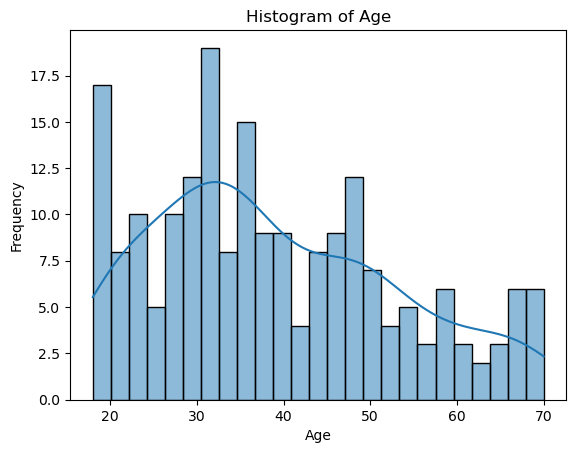

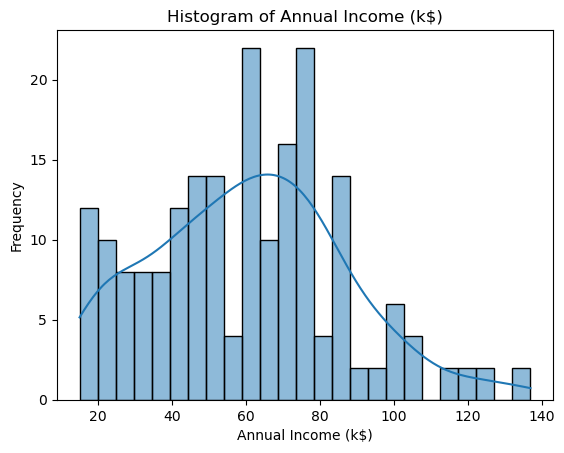

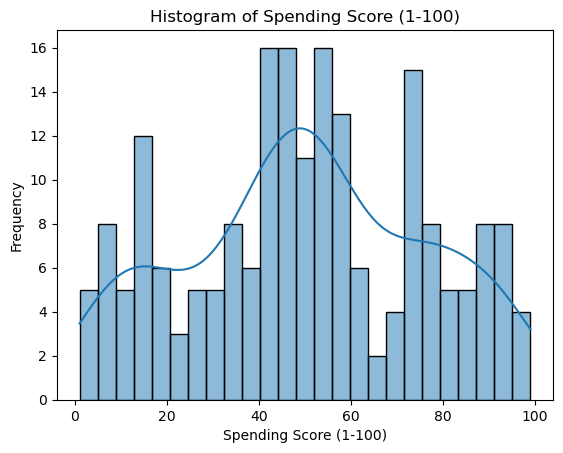

In [92]:
import matplotlib.pyplot as plt
import seaborn as sns

# Iterate over columns and create histograms
for col in ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']:
    plt.figure()
    sns.histplot(customer_df[col], bins=25, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


In [93]:
# Majority of the individuals fall within the age group 40-60 years.Most individuals have an annual income ranging 60K to 80K.Spending score typically falls between 40 and 60.

In [94]:
# one Hot Encoding
dummies = pd.get_dummies(customer_df['Gender'],dtype=int)
dummies

,Female,Male
0,0,1
1,0,1
2,1,0
3,1,0
4,1,0
...,...,...
195,1,0
196,1,0
197,0,1
198,0,1


In [95]:
customer_newdf = pd.concat([customer_df,dummies], axis = 'columns')
customer_newdf

,Gender,Age,Annual Income (k$),Spending Score (1-100),Female,Male
0,Male,19,15,39,0,1
1,Male,21,15,81,0,1
2,Female,20,16,6,1,0
3,Female,23,16,77,1,0
4,Female,31,17,40,1,0
...,...,...,...,...,...,...
195,Female,35,120,79,1,0
196,Female,45,126,28,1,0
197,Male,32,126,74,0,1
198,Male,32,137,18,0,1


In [96]:
customer_newdf.drop(columns=['Gender'], inplace=True)

In [97]:
# scaling the data
scaler = StandardScaler()
scaler.fit(customer_newdf)
scaled_data = scaler.transform(customer_newdf)

Applying Dimentionality Reduction Technique: PCA

In [127]:
# Getting the first 2 Principal Components
pca = PCA(n_components=2)
# Getting the components by calling the 'fit_transform()' method with the data
pca_components = pca.fit_transform(scaled_data)

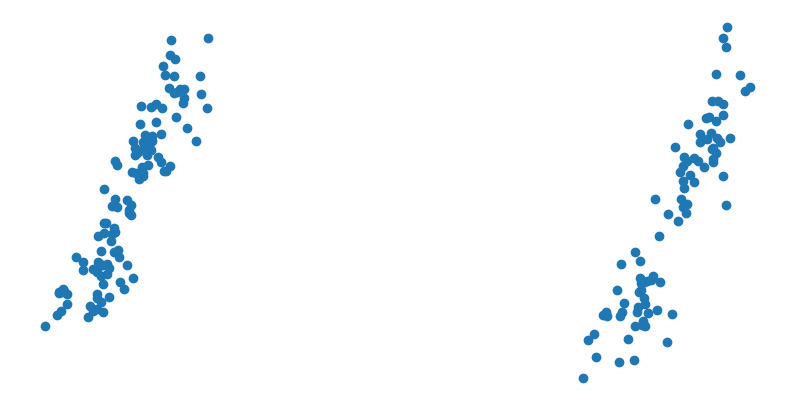

In [99]:
plt.figure(figsize=(10,5))
plt.scatter(pca_components[:, 0], pca_components[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [100]:
# Applying Another Dimentionality Reduction Technique: t-SNE
from sklearn.manifold import TSNE

# Applying t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(scaled_data)


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 200 samples in 0.000s...
[t-SNE] Computed neighbors for 200 samples in 0.025s...
[t-SNE] Computed conditional probabilities for sample 200 / 200
[t-SNE] Mean sigma: 1.164170
[t-SNE] KL divergence after 250 iterations with early exaggeration: 42.615410
[t-SNE] KL divergence after 300 iterations: 0.174218


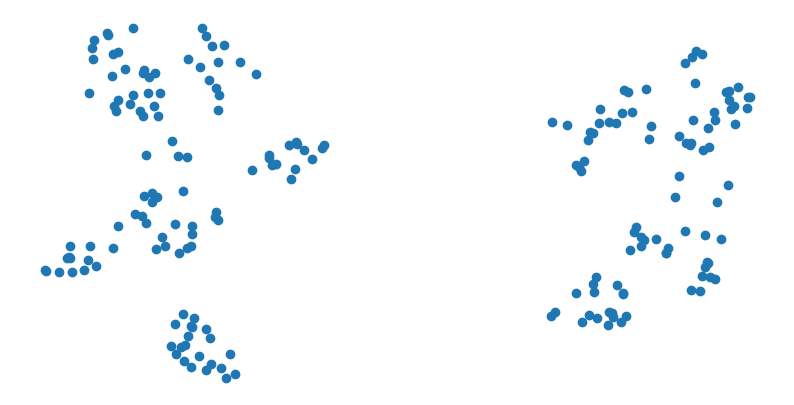

In [101]:
plt.figure(figsize=(10,5))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [102]:
!pip install umap-learn
import umap
# Applying another dimensionality reduction technique UMAP
umap_results = umap.UMAP(n_neighbors =5,min_dist=0.3,metric='correlation').fit_transform(scaled_data)

Error processing line 3 of C:\Anaconda\chowd\anaconda3\lib\site-packages\googleapis_common_protos-1.61.0-py3.9-nspkg.pth:

  Traceback (most recent call last):
    File "C:\Anaconda\chowd\anaconda3\lib\site.py", line 169, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 562, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored


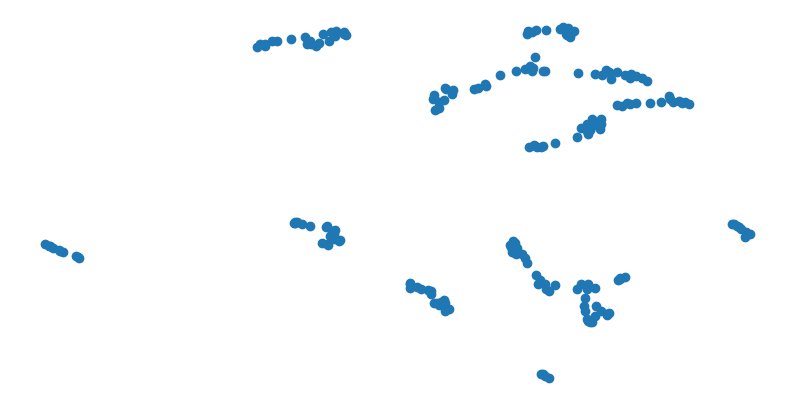

In [103]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

Visually it appears that the best method for dimensionality  reduction is UMAP as it helps to better seggregate the different clusters.

In [104]:
# Applying K Means Clustering
kmeans_cluster = KMeans(n_clusters=3, random_state=123)

# Fit model
%timeit kmeans_cluster.fit(scaled_data)
y_pred = kmeans_cluster.predict(scaled_data)

42.1 ms ± 5.93 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


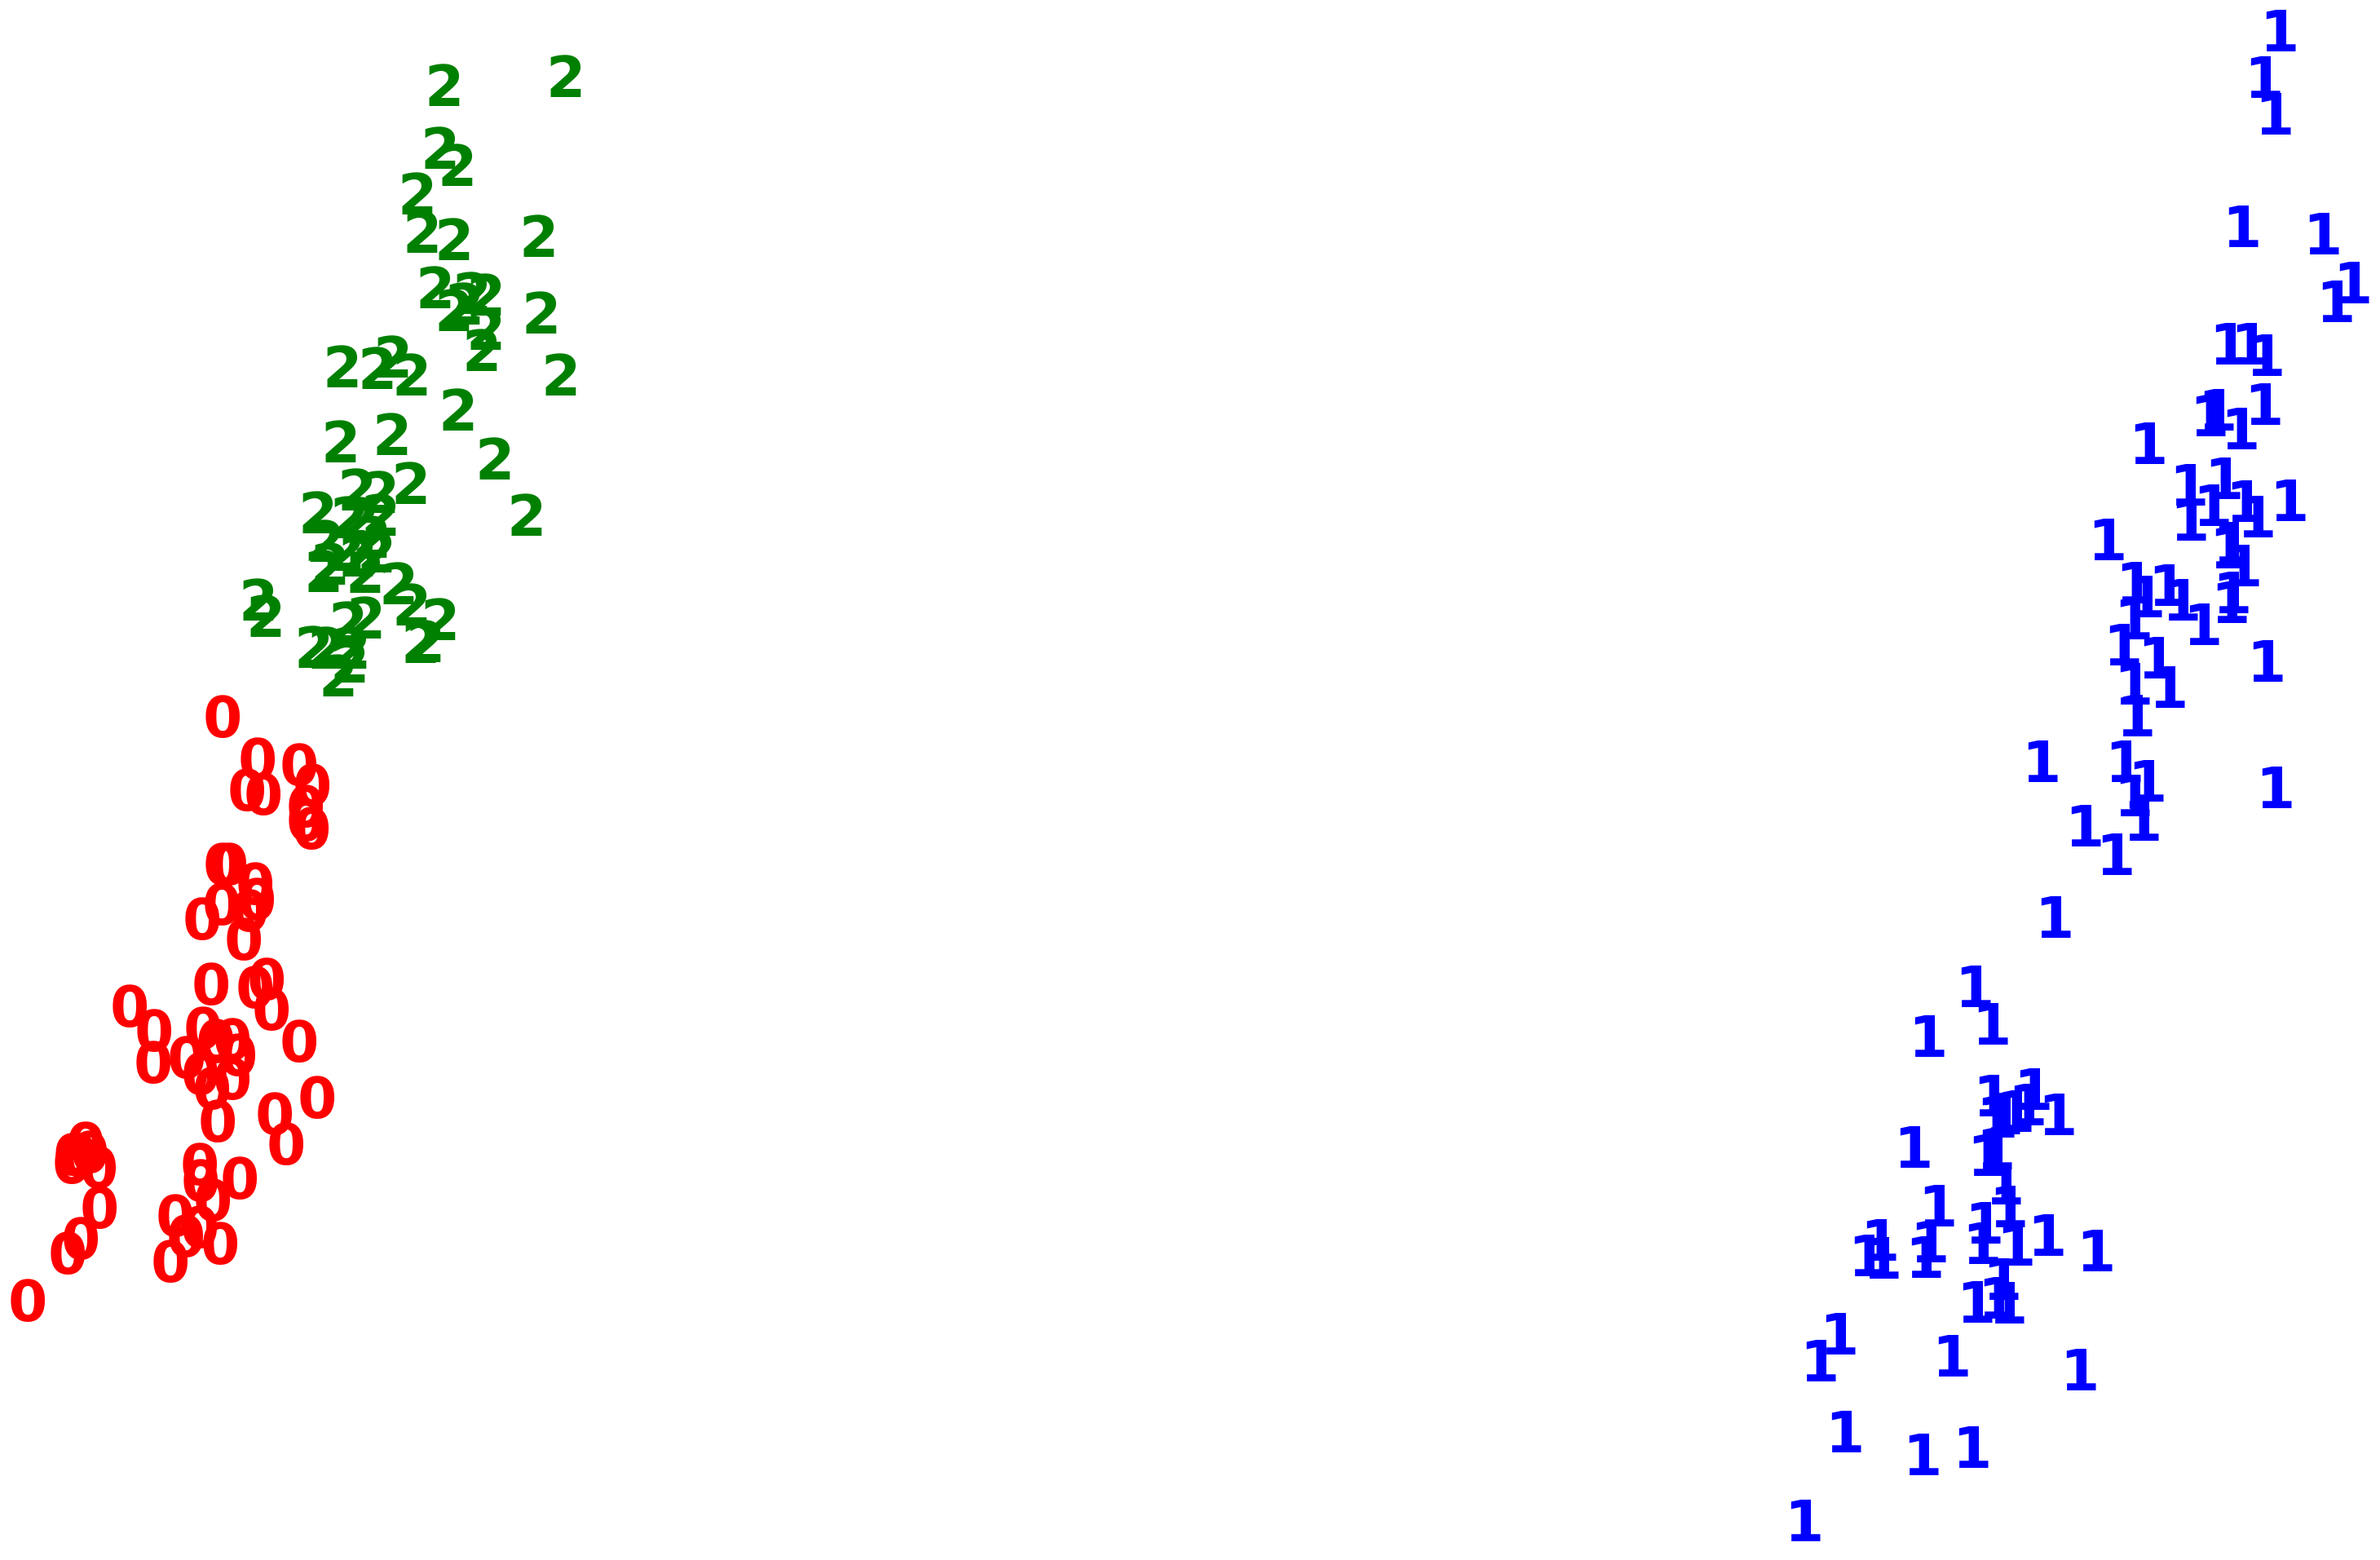

In [105]:
pca = PCA(n_components=2).fit_transform(scaled_data)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(y_pred[i]),
             color=colours[y_pred[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()


In [117]:
labels = KMeans(n_clusters=3, random_state=123).fit_predict(scaled_data)
print(metrics.silhouette_score(scaled_data, labels, metric='euclidean'))

0.3116913806629492


In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn import datasets, metrics

In [110]:
# Applying hierarchical clustering
agg_cluster = AgglomerativeClustering(linkage='complete', 
                                      n_clusters=3)

clusters = agg_cluster.fit_predict(scaled_data)


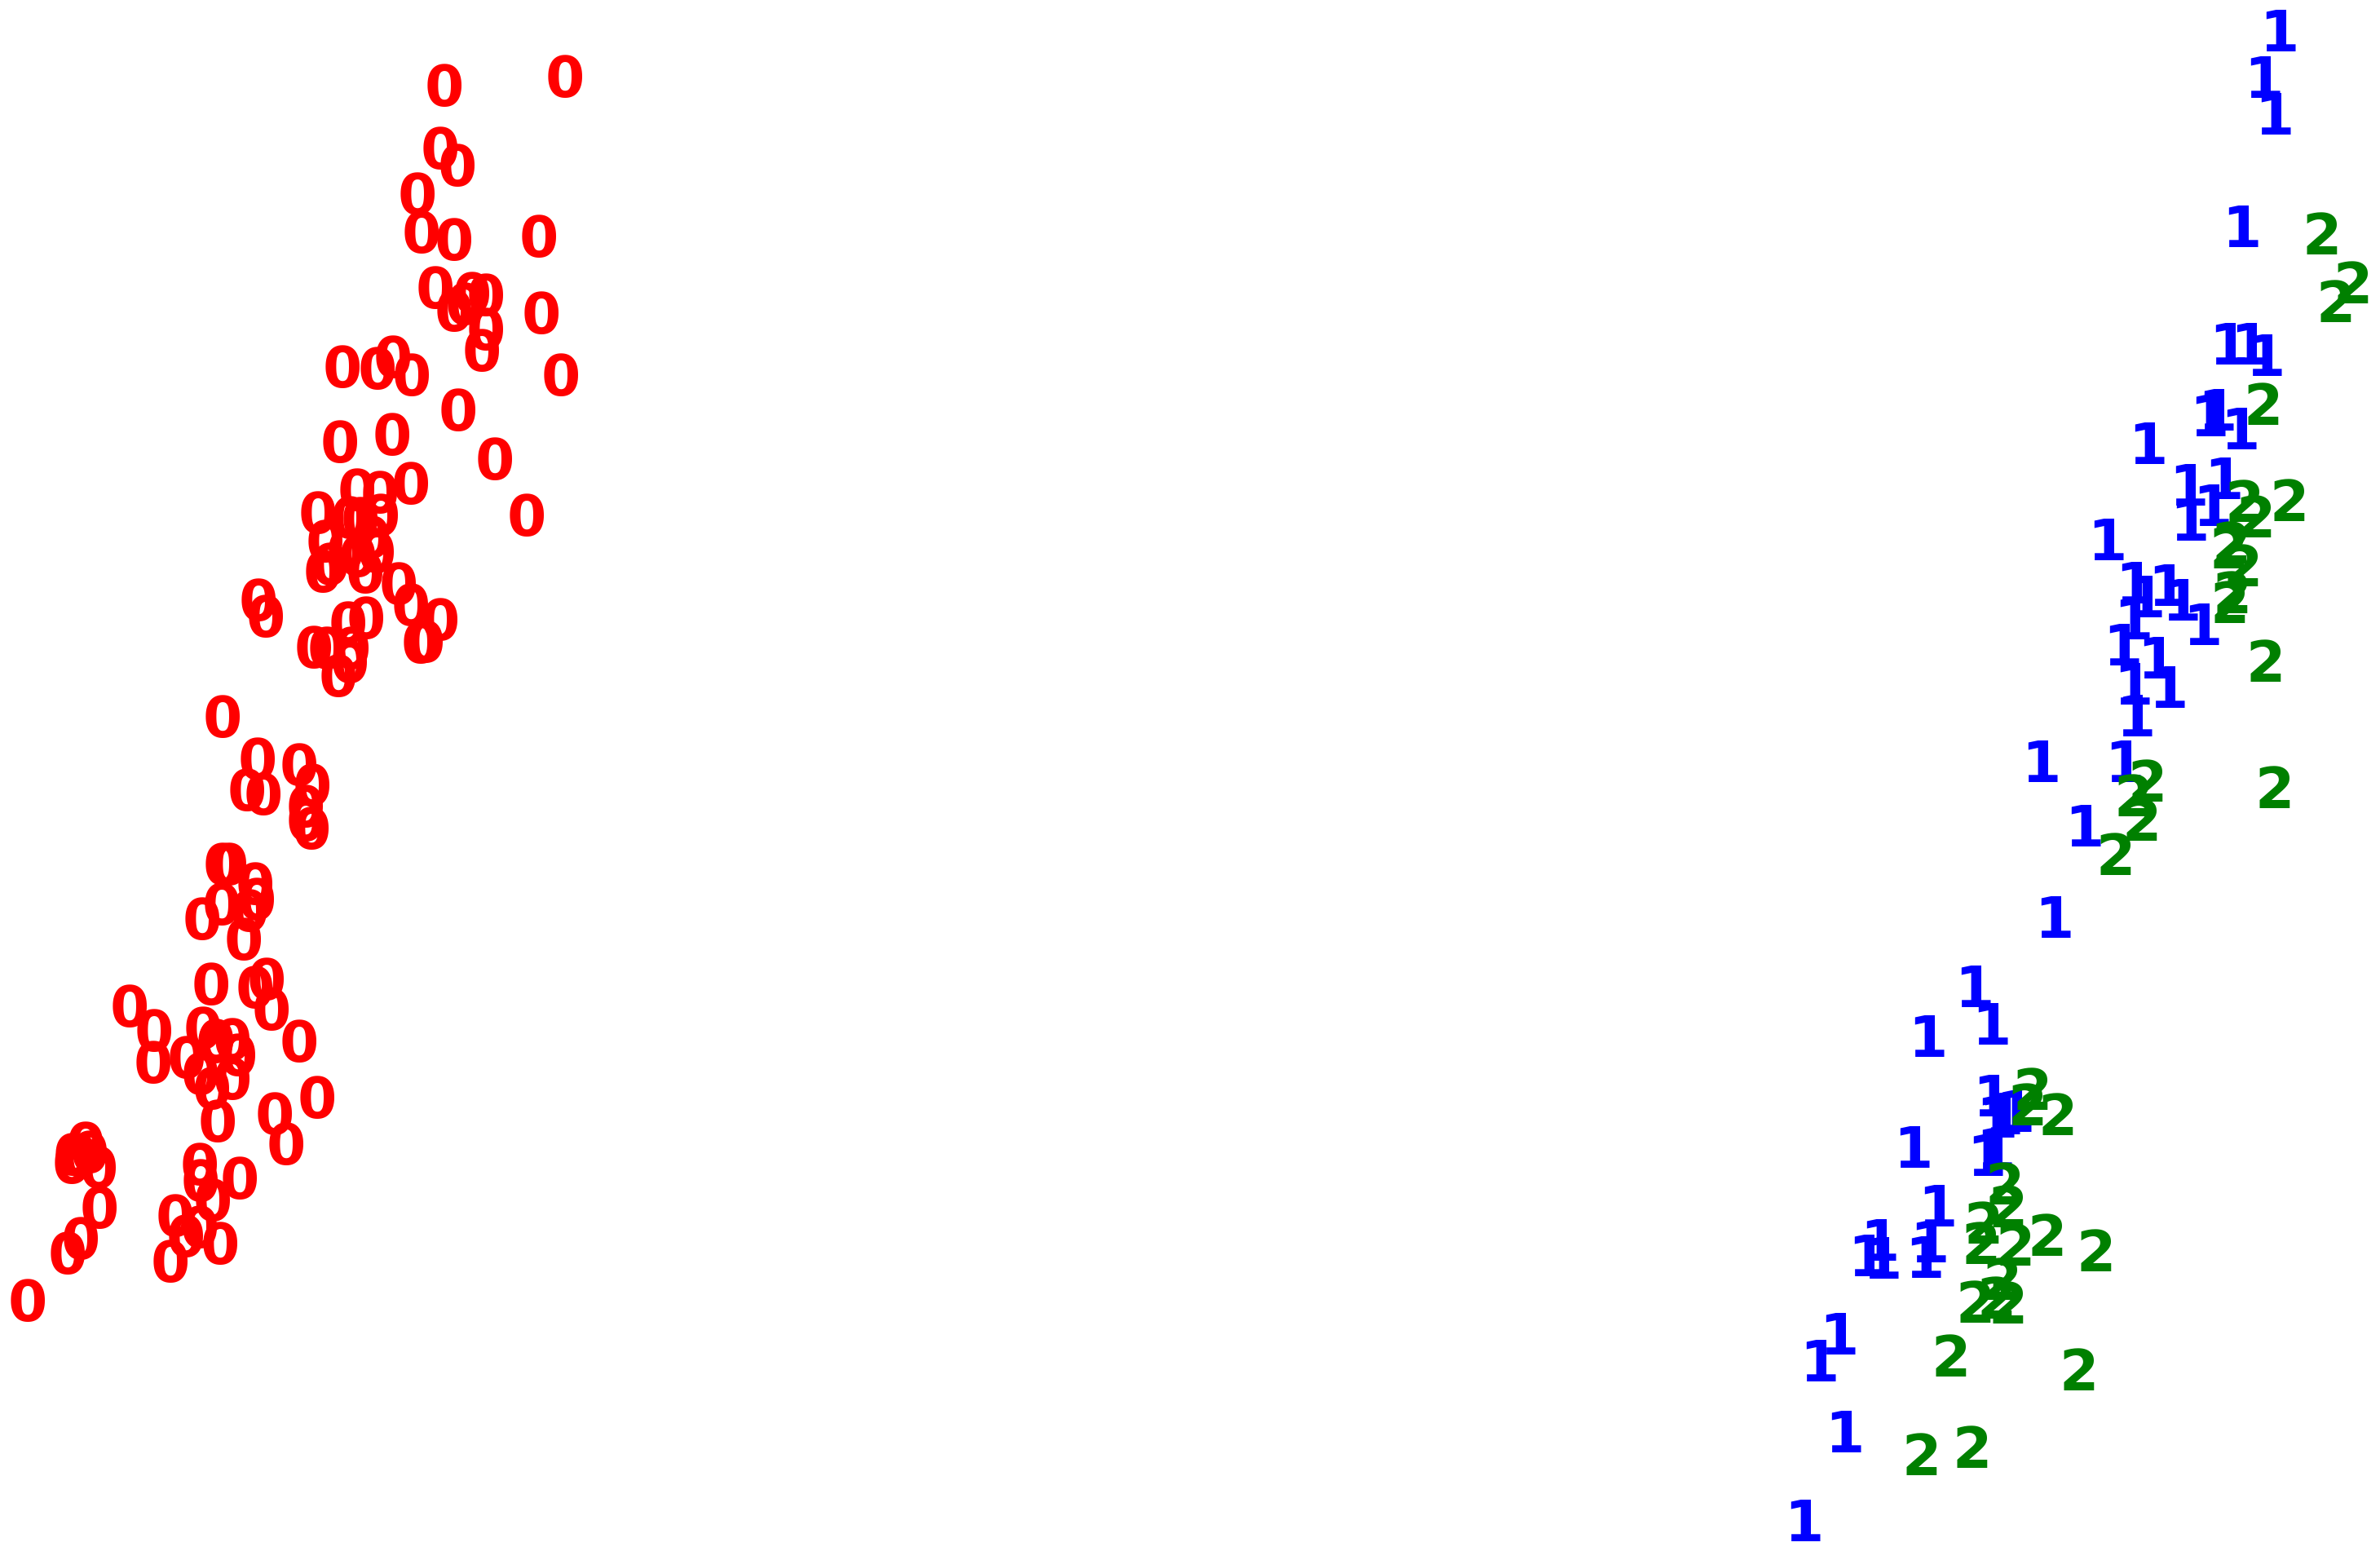

In [112]:
pca = PCA(n_components=2).fit_transform(scaled_data)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[clusters[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()


In [119]:
print("The silhouette score of the Agglomerative Clustering solution: {}"
      .format(metrics.silhouette_score(scaled_data, clusters, metric='euclidean')))

The silhouette score of the Agglomerative Clustering solution: 0.3177626945508553


In [122]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn import datasets, metrics
# Appying DBSCAN clustering technique
# Defining the agglomerative clustering
dbscan_cluster = DBSCAN(eps=1, min_samples=5)

# Fit model
clusters = dbscan_cluster.fit_predict(scaled_data)

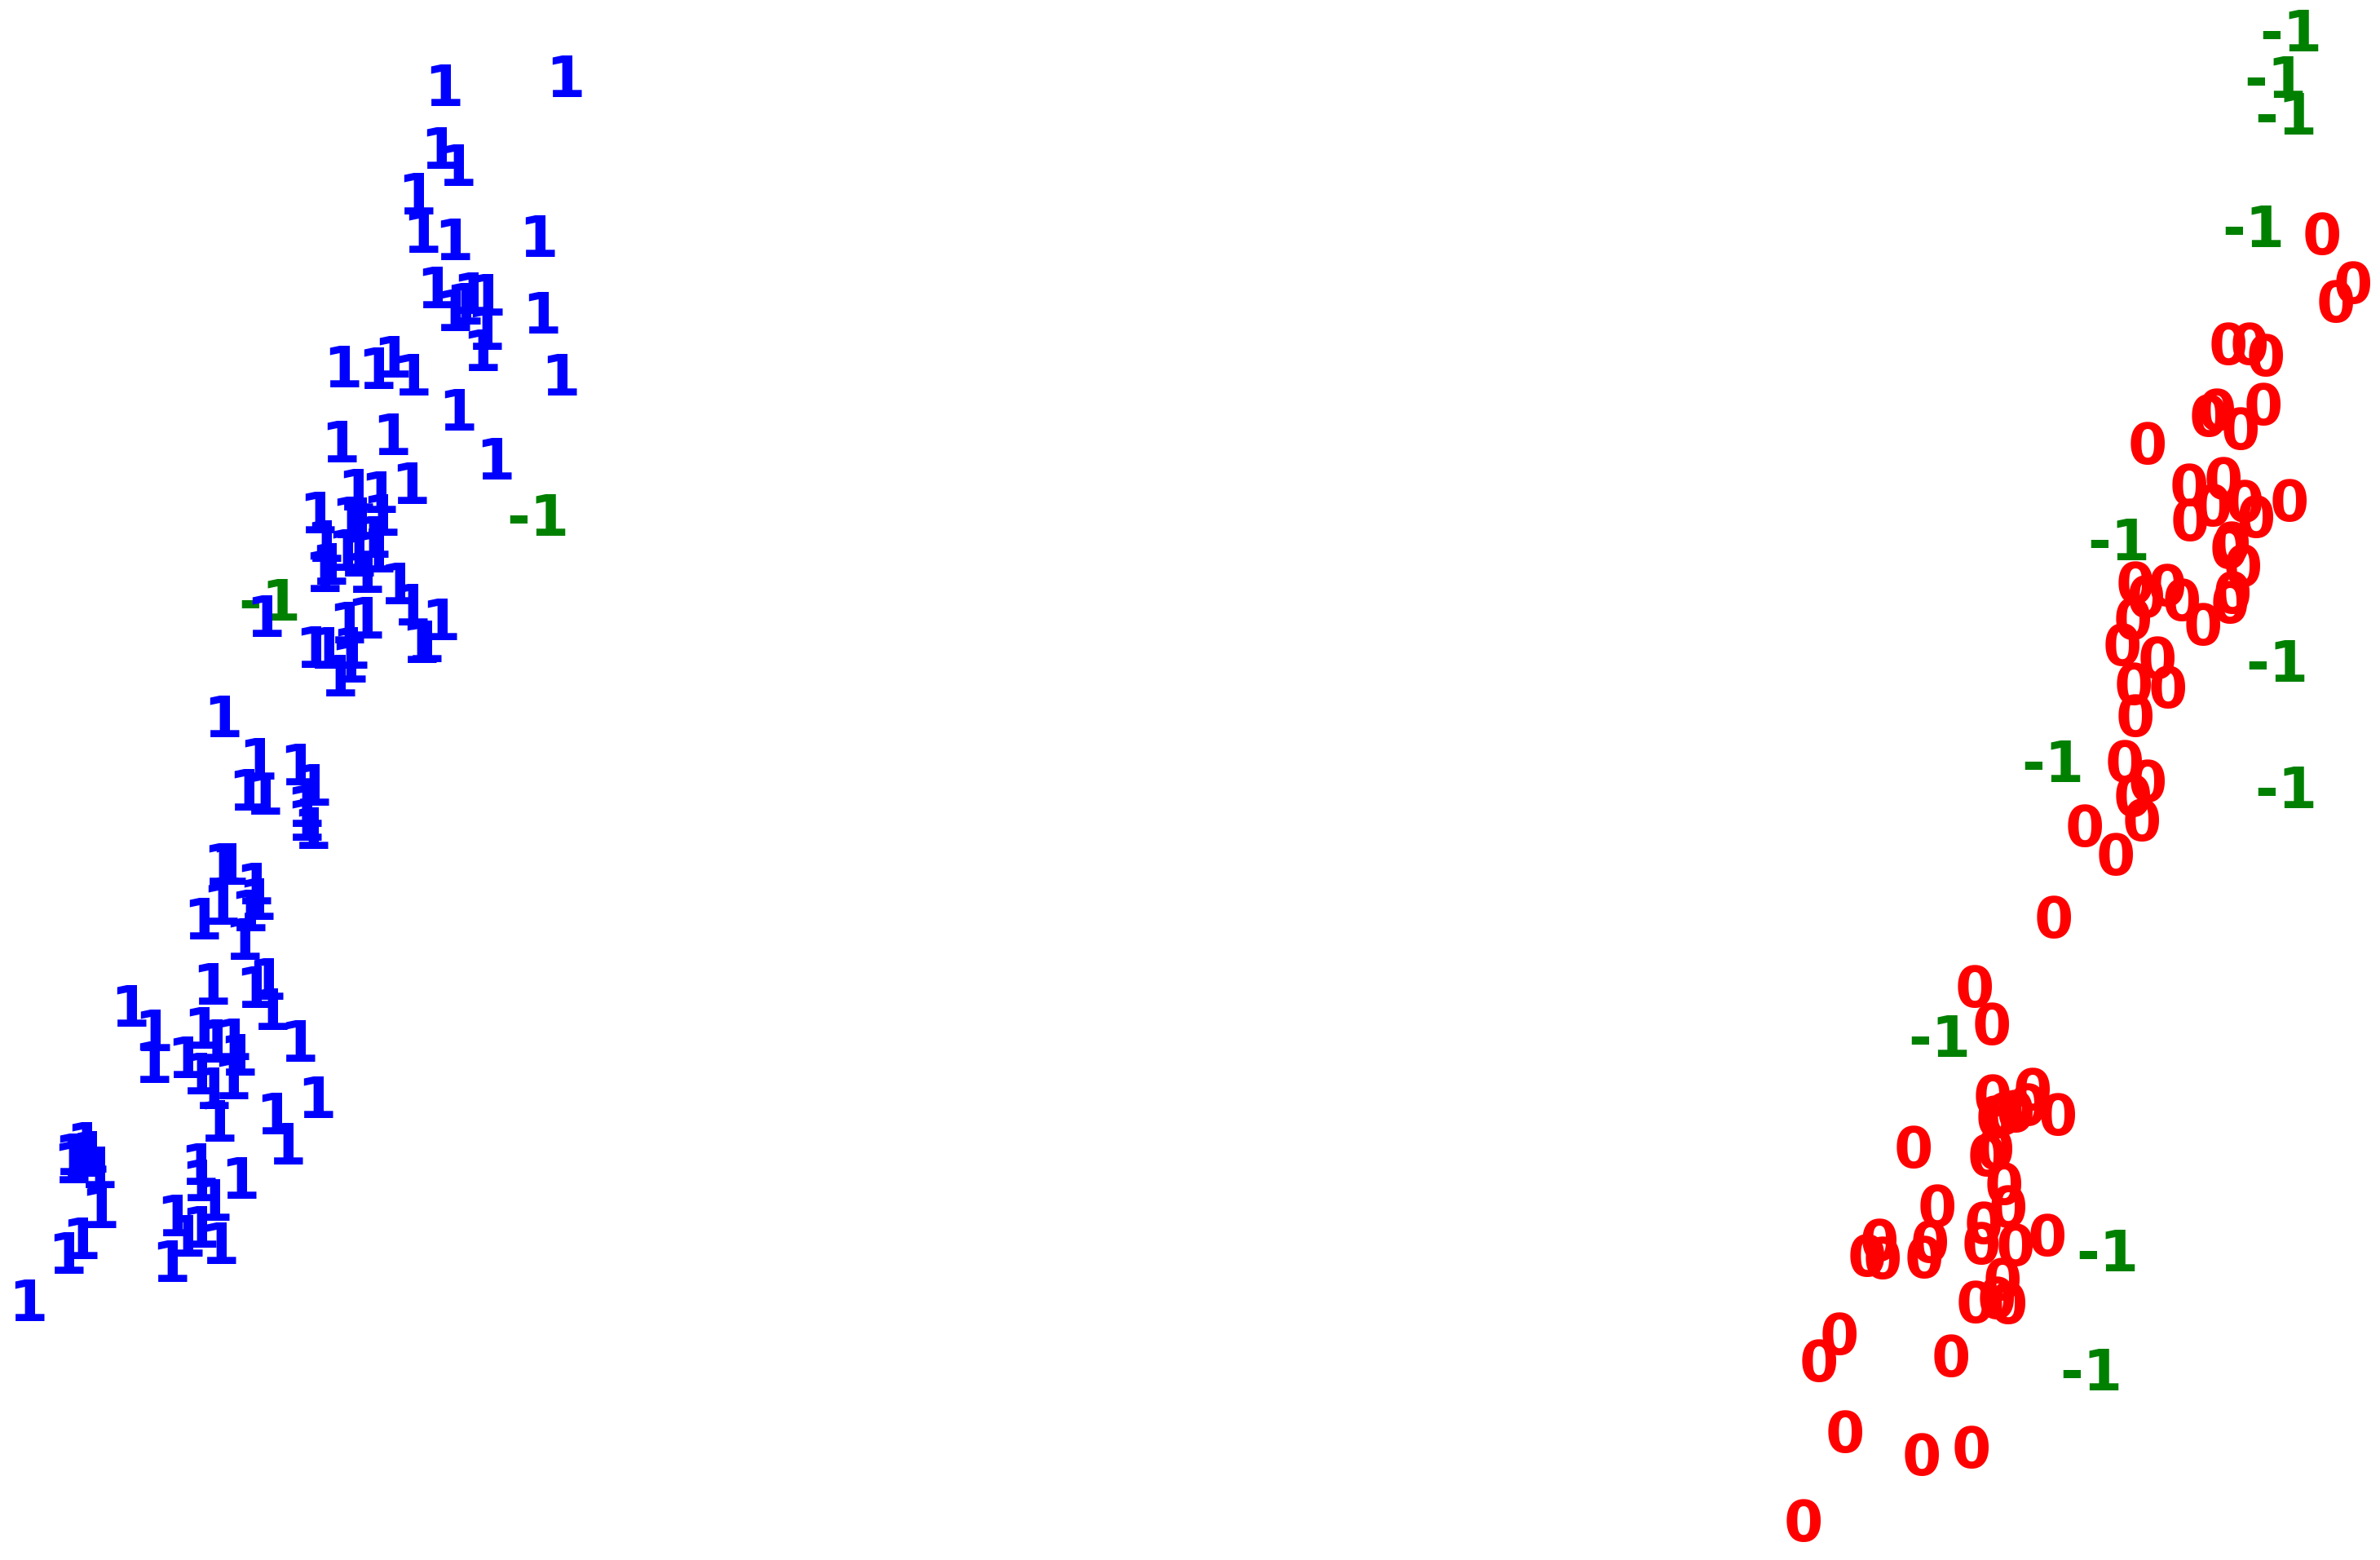

In [124]:
pca = PCA(n_components=2).fit_transform(scaled_data)

plt.figure(figsize=(10,5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(clusters[i]),
             color=colours[clusters[i]],
             fontdict={'weight': 'bold', 'size': 50}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [125]:
print("The silhouette score of the DBSCAN solution: {}"
      .format(metrics.silhouette_score(scaled_data, clusters, metric='euclidean')))

The silhouette score of the DBSCAN solution: 0.34063292216521535


From the different clustering visualizations it appears that K-Means Clustering is the best method here in clustering or seggregating the customers into different groups based on their similarity levels.

Dimensionality Reduction and K-Means clustering helped to provide valuable insights into the structure,pattern and relationships within the data.
The well separated clusters in the reduced space especially for K-Means suggest tha the original features contain meaningful information that distinguishes different groups within the data.
Outliers have become more apparent after dimensionality reduction as they appear as data points that do not conform to the overall structure of the data in the reduced space, for example in DBSCAN -1 represents the outliers.